In [241]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
plt.rcParams['axes.unicode_minus'] = False 

#generate a data set of 20. 
#for simplicity, 10 in the first quadrant, another 10 in the third quadrant 
trainX1 = []
trainY1 = []
trainX2 = []
trainY2 = []

for i in range(50):
    trainX1.append(random.uniform(0,1))
    trainY1.append(random.uniform(0,1))
    trainX2.append(random.uniform(-1,0))
    trainY2.append(random.uniform(-1,0))
    
#label the data
trainData1 = [np.array([1,trainX1[i],trainY1[i],1]) for i in range(50)]
trainData2 = [np.array([1,trainX2[i],trainY2[i],-1]) for i in range(50)]
trainData = trainData1 + trainData2

In [242]:
class Perceptron(object):
    def __init__(self, data, learningRate):
        self.W = np.zeros(len(data[0:3]))
        self.updates = 0
        self.n = learningRate
        self.errors = 0
        
    
    def predict(self, x):
        return np.sign(np.dot(self.W.T,x))
    
    def calculateErrorRate(self, testData):
        X = np.array(testData)[:,0:3]
        d = np.array(testData)[:, 3:4]
        for i in range(len(testData)):
                y = self.predict(X[i])
                if y != d[i]:
                    self.errors += 1
        return ((self.errors)/len(testData))*100
                    
                    
    
    def fit(self, data):
        X = np.array(data)[:,0:3]
        d = np.array(data)[:, 3:4]
        while self.updates<=999:
            for i in range(len(data)):
                y = self.predict(X[i])
                if y * d[i] <= 1:
                    self.W = self.W + self.n * (d[i] - y) * X[i]
                    self.updates += 1
                

In [243]:
#n = 100

perceptron = Perceptron(trainData, 100)
perceptron.fit(trainData)
print("Weight matrix =",perceptron.W)
print ("Number of updates =", perceptron.updates)

Weight matrix = [-100.          355.93856047  292.31557985]
Number of updates = 1000


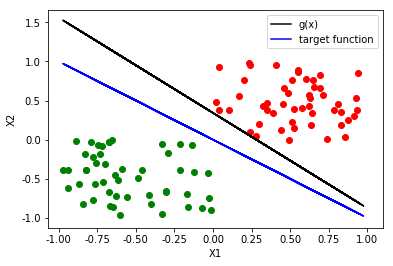

In [244]:
x = np.array(trainData)[:,0:3]

plt.plot(trainX1, trainY1, 'ro')
plt.plot(trainX2, trainY2, 'go')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-' ,label = 'g(x)')

plt.plot(x, -x, color='blue', linestyle='-', label = 'target function')#target function

plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

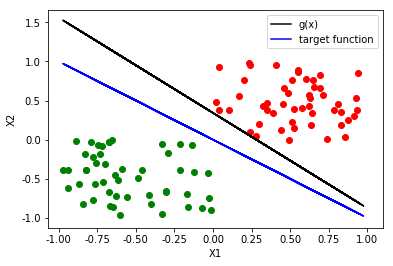

In [245]:
X1 = []
Y1 = []
X2 = []
Y2 = []

for i in range(5000):
    X1.append(random.uniform(0,1))
    Y1.append(random.uniform(0,1))
    X2.append(random.uniform(-1,0))
    Y2.append(random.uniform(-1,0))
    
#label the data
testData1 = [np.array([1,X1[i],Y1[i],1]) for i in range(5000)]
testData2 = [np.array([1,X2[i],Y2[i],-1]) for i in range(5000)]
testData = testData1 + testData2

x = np.array(trainData)[:,0:3]

plt.plot(trainX1, trainY1, 'ro')
plt.plot(trainX2, trainY2, 'go')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-', label = 'g(x)')
plt.plot(x, -x, color='blue', linestyle='-', label = 'target function')#target function
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [246]:
print("Error rate on Test data is: ",perceptron.calculateErrorRate(testData),"%")

Error rate on Test data is:  2.32 %


In [247]:
#1.5 b 
#n = 1
perceptron = Perceptron(trainData, 1)
perceptron.fit(trainData)
print("Weight matrix =",perceptron.W)
print ("Number of updates =", perceptron.updates)

Weight matrix = [-1.         3.5593856  2.9231558]
Number of updates = 1000


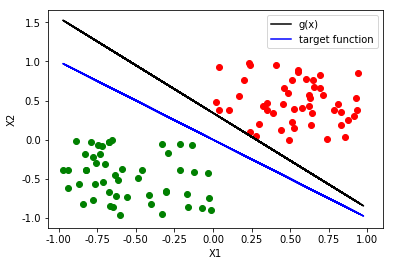

In [248]:
x = np.array(trainData)[:,0:3]

plt.plot(trainX1, trainY1, 'ro')
plt.plot(trainX2, trainY2, 'go')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-',label =  'g(x)')
plt.plot(x, -x, color='blue', linestyle='-', label = 'target function')#target function
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()


In [249]:
print("Error rate on Test data is: ",perceptron.calculateErrorRate(testData))


Error rate on Test data is:  2.32


In [250]:
#1.5 c
#n = 0.01
perceptron = Perceptron(trainData, 0.01)
perceptron.fit(trainData)
print("Weight matrix =",perceptron.W)
print ("Number of updates =", perceptron.updates)

Weight matrix = [-0.01        0.03559386  0.02923156]
Number of updates = 1000


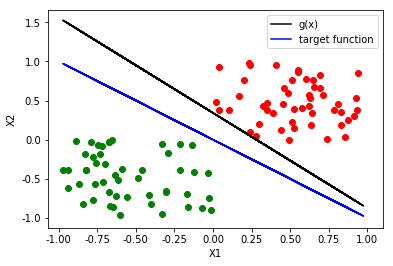

In [251]:
x = np.array(trainData)[:,0:3]

plt.plot(trainX1, trainY1, 'ro')
plt.plot(trainX2, trainY2, 'go')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-', label = 'g(x)')
plt.plot(x, -x, color='blue', linestyle='-', label = 'target function')#target function
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [252]:
print("Error rate on Test data is: ",perceptron.calculateErrorRate(testData),"%")

Error rate on Test data is:  2.32 %


In [253]:
#1.5 d
#n = 0.0001
perceptron = Perceptron(trainData, 0.0001)
perceptron.fit(trainData)
print("Weight matrix =",perceptron.W)
print ("Number of updates =", perceptron.updates)

Weight matrix = [-0.0001      0.00035594  0.00029232]
Number of updates = 1000


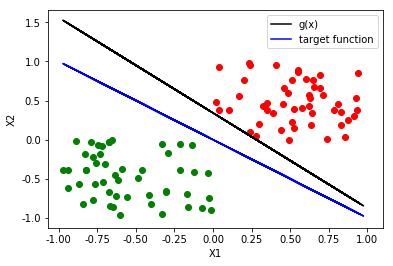

In [254]:
x = np.array(trainData)[:,0:3]

plt.plot(trainX1, trainY1, 'ro')
plt.plot(trainX2, trainY2, 'go')
plt.plot(x, (-perceptron.W[0]-perceptron.W[1]*x)/perceptron.W[2], color='black', linestyle='-', label = 'g(x)')
plt.plot(x, -x, color='blue', linestyle='-', label = 'target function')#target function
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X1");
plt.ylabel("X2");
plt.show()

In [255]:
print("Error rate on Test data is: ",perceptron.calculateErrorRate(testData),"%")

Error rate on Test data is:  2.32 %
